In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.style.use('bmh')

# Kaplan-Meier Estimator

In [2]:
df = pd.read_csv('./data/stanford2.csv')
df.head()

,Unnamed: 0,id,time,status,age,t5
0,139,139,86.0,1,12,1.26
1,159,159,10.0,1,13,1.49
2,181,181,60.0,0,13,NaN
3,119,119,1116.0,0,14,0.54
4,74,74,2006.0,0,15,1.26


* Total risk set size: 184
* Sort the records by `time` column
* Check how many deaths happened in each time instance

In [3]:
df_sorted = df.sort_values(by=['time'])
event_counts = df_sorted[df_sorted['status'] == 1].groupby('time').size().reset_index(name='event/death')

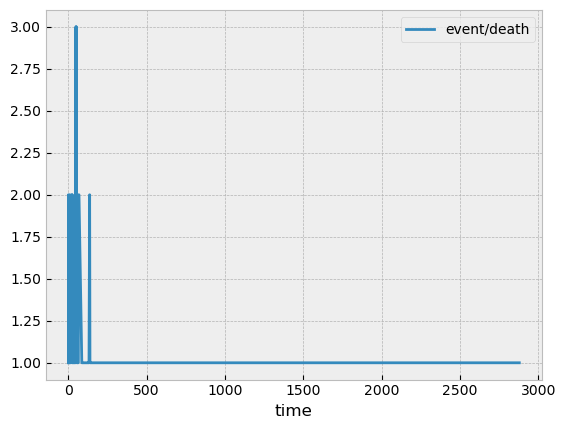

In [4]:
event_counts.plot(x='time', y='event/death');

For few time instances, there are multiple deaths, hense $d_i > 1$

In [5]:
df_sorted

,Unnamed: 0,id,time,status,age,t5
71,21,21,0.5,1,41,0.87
171,16,16,1.0,1,54,0.47
22,184,184,1.0,0,27,NaN
15,133,133,1.0,1,21,0.47
60,183,183,2.0,0,39,NaN
...,...,...,...,...,...,...
141,25,25,2878.0,1,49,0.75
39,38,38,2984.0,0,32,0.19
59,36,36,3021.0,0,38,0.98
101,26,26,3410.0,0,45,0.98


In [6]:
from lifelines import KaplanMeierFitter
kmft = KaplanMeierFitter()
kmft.fit(df_sorted['time'], df_sorted['status'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 184 total observations, 71 right-censored observations>

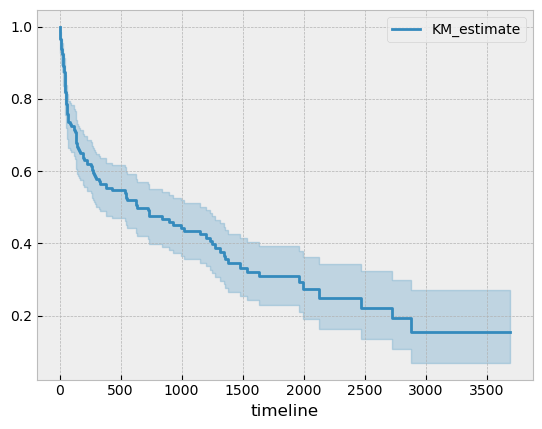

In [7]:
kmft.plot_survival_function();

In [8]:
pd.DataFrame(kmft.survival_function_at_times(times=[1.5, 2878, 3500]))

,KM_estimate
1.5,0.983696
2878.0,0.154919
3500.0,0.154919


* 2878 $\rightarrow$ Avail
* 1.5 & 3500 $\rightarrow$ No

In [9]:
kmft.confidence_interval_survival_function_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
0.5,0.962052,0.999233
1.0,0.950307,0.994712
2.0,0.950307,0.994712
3.0,0.942962,0.991762
...,...,...
2878.0,0.069245,0.271866
2984.0,0.069245,0.271866
3021.0,0.069245,0.271866
3410.0,0.069245,0.271866


# Log-rank test

In [10]:
df = pd.read_csv('./data/veteran.csv')

In [11]:
df1 = df[df['trt']==1].drop(['trt', 'Unnamed: 0'], axis=1)
df2 = df[df['trt']==2].drop(['trt', 'Unnamed: 0'], axis=1)

In [12]:
from lifelines import KaplanMeierFitter

In [13]:
kmft1 = KaplanMeierFitter()
kmft1.fit(df1['time'], df1['status'], label='Treatment Group 1')

kmft2 = KaplanMeierFitter()
kmft2.fit(df2['time'], df2['status'], label='Treatment Group 2')

<lifelines.KaplanMeierFitter:"Treatment Group 2", fitted with 68 total observations, 4 right-censored observations>

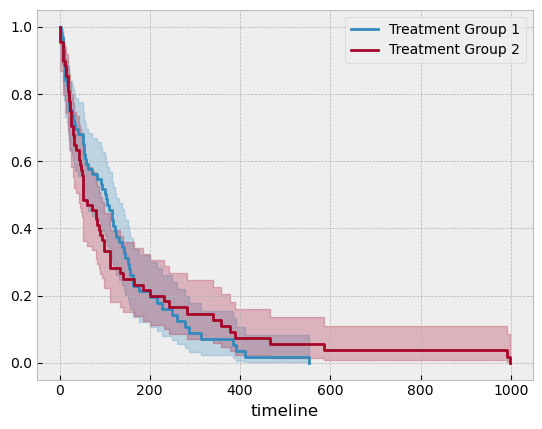

In [14]:
kmft1.plot_survival_function();
kmft2.plot_survival_function();

In [15]:
df_sorted = df.sort_values(by=['time'])
df_sorted

,Unnamed: 0,trt,celltype,time,status,karno,diagtime,age,prior
76,77,2,squamous,1,1,20,21,65,10
84,85,2,squamous,1,1,50,7,35,0
94,95,2,smallcell,2,1,40,36,44,10
52,53,1,adeno,3,1,30,3,43,0
17,18,1,smallcell,4,1,40,2,35,0
...,...,...,...,...,...,...,...,...,...
82,83,2,squamous,467,1,90,2,64,0
57,58,1,large,553,1,70,2,47,0
77,78,2,squamous,587,1,60,3,58,0
74,75,2,squamous,991,1,70,7,50,10
